In [1]:
#s3_prediction = "s3://aegovan-data/chemprot/predictions_chemprot-bert-f1-2022-05-22-23-18-21-560/prediction_chemprot_test.json"
s3_train="s3://aegovan-data/chemprot/predictions_chemprot-abstract-bert-f1-2022-07-30-22-34-07-969/prediction_chemprot_abstract_train.json"
s3_test="s3://aegovan-data/chemprot/predictions_chemprot-abstract-bert-f1-2022-07-30-22-34-07-969/prediction_chemprot_abstract_test.json"




In [2]:
import sys, os, pandas as pd
sys.path.append("../src")

import utils

In [3]:
from utils.s3_utils import download_file as download_s3_file


In [4]:
def write_chemprot_eval(df, dest_file):
    df = df[["abstract_id","prediction", "participant1_id", "participant2_id"]].query("prediction != 'NEGATIVE'").copy(deep=True)
    

    df["participant1_id"] = df["participant1_id"].apply(lambda x: f"Arg1:{x}")
    df["participant2_id"] = df["participant2_id"].apply(lambda x: f"Arg2:{x}")
    df.to_csv(dest_file, sep="\t", header=False, index=False)

In [5]:
local_temp ="./temp"

In [6]:
local_prediction_dir = os.path.join(local_temp, "prediction")
os.makedirs(local_prediction_dir, exist_ok=True)
local_train_file  = download_s3_file( s3_train, local_prediction_dir)
local_test_file  = download_s3_file( s3_test, local_prediction_dir)

In [7]:
df_test = pd.read_json(local_test_file)
df_test.head()

,abstract_id,abstract,participant1_id,participant1,participant2_id,participant2,annotations,relationship_type,relationship_group,is_eval,...,NEGATIVE,CPR:3,CPR:4,CPR:5,CPR:6,CPR:9,prediction,confidence,confidence_std,raw_confidence
0,10076535,Androgen antagonistic effect of estramustine p...,T23,"{'abstract_id': '10076535', 'id': 'T23', 'enti...",T55,"{'abstract_id': '10076535', 'id': 'T55', 'enti...","[{'abstract_id': '10076535', 'id': 'T10', 'ent...",DIRECT-REGULATOR,CPR:2,N,...,0.916886,0.014671,0.053705,0.003942,0.004201,0.006595,NEGATIVE,0.916886,NaN,[0.91688585281372]
1,10076535,Androgen antagonistic effect of estramustine p...,T2,"{'abstract_id': '10076535', 'id': 'T2', 'entit...",T48,"{'abstract_id': '10076535', 'id': 'T48', 'enti...","[{'abstract_id': '10076535', 'id': 'T10', 'ent...",DIRECT-REGULATOR,CPR:2,N,...,0.169072,0.026358,0.332900,0.024690,0.444394,0.002586,CPR:6,0.444394,NaN,[0.444393634796142]
2,10076535,Androgen antagonistic effect of estramustine p...,T3,"{'abstract_id': '10076535', 'id': 'T3', 'entit...",T48,"{'abstract_id': '10076535', 'id': 'T48', 'enti...","[{'abstract_id': '10076535', 'id': 'T10', 'ent...",DIRECT-REGULATOR,CPR:2,N,...,0.238712,0.020262,0.105996,0.039764,0.592274,0.002992,CPR:6,0.592274,NaN,[0.592274129390716]
3,10076535,Androgen antagonistic effect of estramustine p...,T4,"{'abstract_id': '10076535', 'id': 'T4', 'entit...",T48,"{'abstract_id': '10076535', 'id': 'T48', 'enti...","[{'abstract_id': '10076535', 'id': 'T10', 'ent...",DIRECT-REGULATOR,CPR:2,N,...,0.855846,0.011207,0.022317,0.017417,0.088891,0.004323,NEGATIVE,0.855846,NaN,[0.85584557056427]
4,10076535,Androgen antagonistic effect of estramustine p...,T23,"{'abstract_id': '10076535', 'id': 'T23', 'enti...",T56,"{'abstract_id': '10076535', 'id': 'T56', 'enti...","[{'abstract_id': '10076535', 'id': 'T10', 'ent...",INDIRECT-UPREGULATOR,CPR:3,Y,...,0.912766,0.014528,0.057174,0.004211,0.004895,0.006426,NEGATIVE,0.912766,NaN,[0.9127659201622]


In [8]:
df_train = pd.read_json(local_train_file)
df_train.head()

,abstract_id,abstract,participant1_id,participant1,participant2_id,participant2,annotations,relationship_type,relationship_group,is_eval,...,NEGATIVE,CPR:3,CPR:4,CPR:5,CPR:6,CPR:9,prediction,confidence,confidence_std,raw_confidence
0,10047461,Cyclin E-cdk2 activation is associated with ce...,T13,"{'abstract_id': '10047461', 'id': 'T13', 'enti...",T57,"{'abstract_id': '10047461', 'id': 'T57', 'enti...","[{'abstract_id': '10047461', 'id': 'T1', 'enti...",ACTIVATOR,CPR:3,Y,...,0.001856,0.985230,0.004157,0.006634,0.000715,0.001409,CPR:3,0.985230,NaN,[0.9852301478385921]
1,10047461,Cyclin E-cdk2 activation is associated with ce...,T7,"{'abstract_id': '10047461', 'id': 'T7', 'entit...",T39,"{'abstract_id': '10047461', 'id': 'T39', 'enti...","[{'abstract_id': '10047461', 'id': 'T1', 'enti...",ACTIVATOR,CPR:3,Y,...,0.025322,0.828486,0.134548,0.005754,0.001729,0.004161,CPR:3,0.828486,NaN,[0.8284858465194701]
2,10047461,Cyclin E-cdk2 activation is associated with ce...,T7,"{'abstract_id': '10047461', 'id': 'T7', 'entit...",T40,"{'abstract_id': '10047461', 'id': 'T40', 'enti...","[{'abstract_id': '10047461', 'id': 'T1', 'enti...",ACTIVATOR,CPR:3,Y,...,0.027388,0.831947,0.128891,0.005738,0.001697,0.004339,CPR:3,0.831947,NaN,[0.831947326660156]
3,10047461,Cyclin E-cdk2 activation is associated with ce...,T7,"{'abstract_id': '10047461', 'id': 'T7', 'entit...",T41,"{'abstract_id': '10047461', 'id': 'T41', 'enti...","[{'abstract_id': '10047461', 'id': 'T1', 'enti...",ACTIVATOR,CPR:3,Y,...,0.025173,0.832180,0.131108,0.005712,0.001715,0.004112,CPR:3,0.832180,NaN,[0.8321796655654901]
4,10047461,Cyclin E-cdk2 activation is associated with ce...,T13,"{'abstract_id': '10047461', 'id': 'T13', 'enti...",T55,"{'abstract_id': '10047461', 'id': 'T55', 'enti...","[{'abstract_id': '10047461', 'id': 'T1', 'enti...",INDIRECT-UPREGULATOR,CPR:3,Y,...,0.001591,0.986446,0.003928,0.005923,0.000629,0.001483,CPR:3,0.986446,NaN,[0.986446380615234]


/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


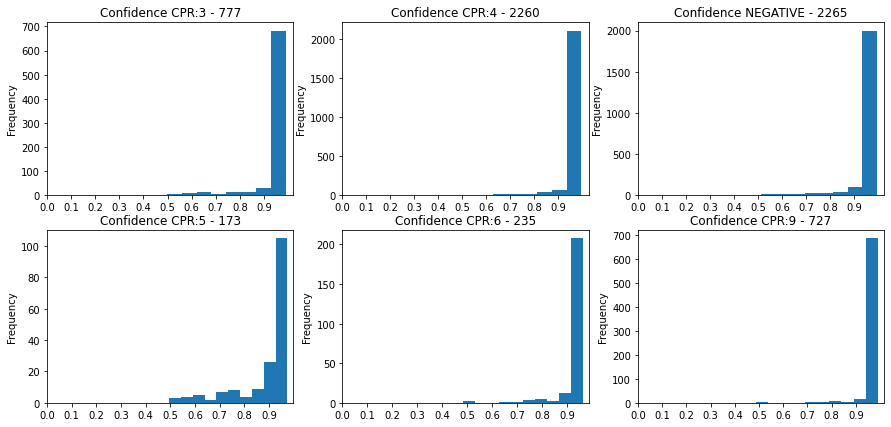

In [9]:
import matplotlib.pyplot as plt

def plot(df):
    labels = list(df["label"].unique())
    fig, axes = plt.subplots(int(len(labels)/3), 3, figsize=(15,7))
    axes = axes.reshape(-1)
    for ax, l in zip(axes,labels):
        df_l = df.query(f"label == '{l}'")
        df_l["confidence"].plot.hist(ax=ax, bins=10, density=False, stacked=True)
        ax.set_title(f"Confidence {l} - {df_l.shape[0]}")
        ticks = list(map(lambda x:x/10 ,range(0,10)))
        ax.set_xticks (ticks)
        ax.set_xticklabels(ticks)
#         ax.set_yticks (ticks)
#         ax.set_yticklabels(ticks)


plot(df_train)        

In [11]:
df_train.groupby("label")["confidence"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
CPR:3,777.0,0.952276,0.088677,0.373859,0.970550,0.981881,0.985295,0.991077
CPR:4,2260.0,0.975194,0.059541,0.380448,0.985064,0.991577,0.993408,0.995124
CPR:5,173.0,0.881541,0.109225,0.495343,0.883772,0.932102,0.942009,0.974219
CPR:6,235.0,0.931084,0.058437,0.482652,0.932065,0.947419,0.954011,0.961183
CPR:9,727.0,0.975350,0.046914,0.486435,0.982013,0.987185,0.989055,0.991134
NEGATIVE,2265.0,0.962670,0.084803,0.393294,0.978931,0.991078,0.994035,0.995910


/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


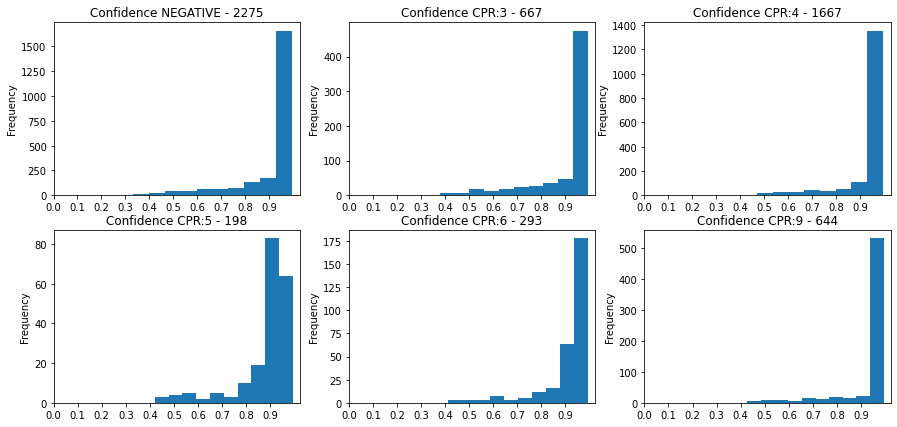

In [12]:
plot(df_test)        